In [313]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [314]:
def modify(x):
    n = len(x)
    for i in range(0, n - 1):
        cnt = 0
        if (x[n - i - 1] >= x[n - i - 2]):
            x[n - i - 1] = x[n - i - 1] - x[n - i - 2]
            cnt = 1

    return x

In [315]:
def cal_ratio(energy_list, task_list):
    n = len(energy_list)
    ratio_list = []
    for i, energy in enumerate(energy_list):
        ratio_list.append(energy_list[i] / task_list[i])
    return ratio_list


In [345]:
dfs = []
for i in range(8):
    df = pd.read_csv('../normal_log/timeslot_{}.txt'.format(i), sep=',')
    df['Reward'] = modify(df['Reward'].tolist())
    df['Energy Consumption'] = modify(df['Energy Consumption'].tolist())
    df['Number of completed tasks'] = modify(df['Number of completed tasks'].tolist())
    df['The Ratio Energy to Tasks'] = cal_ratio(df['Energy Consumption'].tolist(), df['Number of completed tasks'].tolist())
    dfs.append(df)
normal_drl_data = pd.concat(dfs)

In [316]:
dfs = []
for i in range(100):
    df = pd.read_csv('../log_greedy/timeslot_{}.txt'.format(i), sep=',')
    df['Reward'] = modify(df['Reward'].tolist())
    df['Energy Consumption'] = modify(df['Energy Consumption'].tolist())
    df['Number of completed tasks'] = modify(df['Number of completed tasks'].tolist())
    df['The Ratio Energy to Tasks'] = cal_ratio(df['Energy Consumption'].tolist(), df['Number of completed tasks'].tolist())
    dfs.append(df)
greedy_data = pd.concat(dfs)

In [317]:
dfs = []
for i in range(100):
    df = pd.read_csv('../log/timeslot_{}.txt'.format(i), sep=',')
    df['Reward'] = modify(df['Reward'].tolist())
    df['Energy Consumption'] = modify(df['Energy Consumption'].tolist())
    df['Number of completed tasks'] = modify(df['Number of completed tasks'].tolist())
    df['The Ratio Energy to Tasks'] = cal_ratio(df['Energy Consumption'].tolist(), df['Number of completed tasks'].tolist())
    dfs.append(df)
E2EDRL_data = pd.concat(dfs)

In [346]:
greedy_data = pd.read_csv('./greedy.csv', sep=',')
E2EDRL_data = pd.read_csv('./e2edrl.csv', sep=',')

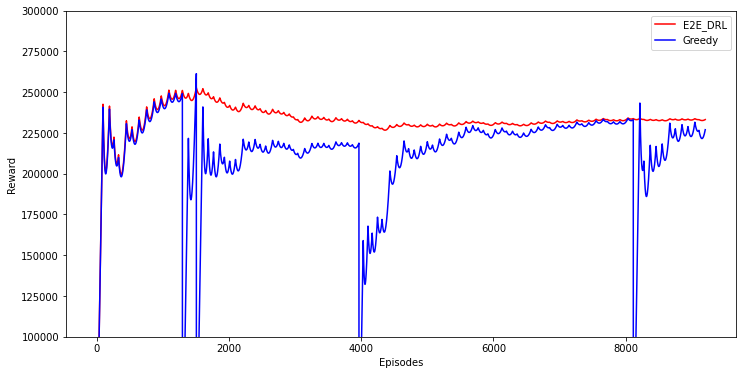

In [333]:
fig, ax = plt.subplots(figsize=(12, 6))

xpoints = np.array(range(E2EDRL_data.shape[0]))
ypoints = np.array(E2EDRL_data['Avg Reward'])
zpoints = np.array(greedy_data['Avg Reward'])

line1,  = ax.plot(ypoints, color='red', label='E2E_DRL')
line2, = ax.plot(zpoints, color='blue', label='Greedy')

plt.ylim([100000, 300000])
plt.xlabel('Episodes')
plt.ylabel('Reward')
ax.legend(handles=[line1, line2])

plt.show()


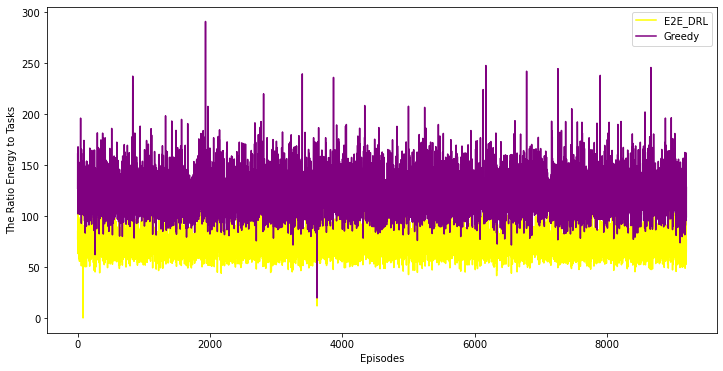

In [340]:

fig, ax = plt.subplots(figsize=(12, 6))

xpoints = np.array(range(E2EDRL_data.shape[0]))
ypoints = np.array(E2EDRL_data['The Ratio Energy to Tasks'])
zpoints = np.array(greedy_data['The Ratio Energy to Tasks'])

line1,  = ax.plot(ypoints, color='yellow', label='E2E_DRL')
line2, = ax.plot(zpoints, color='purple', label='Greedy')

# plt.ylim([100000, 300000])
plt.xlabel('Episodes')
plt.ylabel('The Ratio Energy to Tasks')
ax.legend(handles=[line1, line2])

plt.show()


In [335]:
E2EDRL_data

,Episode,Reward,Avg Reward,Loss,Average Q,Total Frames,Number of completed tasks,Energy Consumption,Epsilon,The Ratio Energy to Tasks
0,0,4800.754151,4800.754151,0.0,0.0,99,42,6794.647858,1.00,77.572528
1,1,4839.700580,7220.604441,0.0,0.0,199,37,6970.318447,1.00,85.617891
2,2,4847.519759,9643.061124,0.0,0.0,299,37,6711.494207,1.00,79.893905
3,3,4855.135129,12068.073247,0.0,0.0,399,43,6895.564828,1.00,73.437659
4,4,4849.984643,14493.077450,0.0,0.0,499,40,6670.005279,1.00,75.476160
...,...,...,...,...,...,...,...,...,...,...
9198,9198,4851.750059,233114.721151,0.0,0.0,915436,40,3088.162802,0.01,77.204070
9199,9199,4866.259870,233137.955600,0.0,0.0,915536,47,3006.147566,0.01,63.960587
9200,9200,4858.523793,233161.713042,0.0,0.0,915636,45,2991.343055,0.01,66.474290
9201,9201,4865.265440,233185.994038,0.0,0.0,915736,45,2884.562077,0.01,64.101379


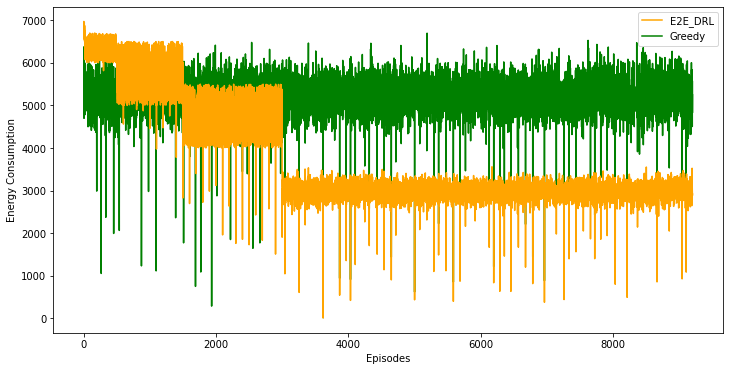

In [337]:

fig, ax = plt.subplots(figsize=(12, 6))

xpoints = np.array(range(E2EDRL_data.shape[0]))
ypoints = np.array(E2EDRL_data['Energy Consumption'])
zpoints = np.array(greedy_data['Energy Consumption'])

line2, = ax.plot(zpoints, color='green', label='Greedy')
line1,  = ax.plot(ypoints, color='orange', label='E2E_DRL')

# plt.ylim([100000, 300000])
plt.xlabel('Episodes')
plt.ylabel('Energy Consumption')
ax.legend(handles=[line1, line2])

plt.show()


In [338]:
E2EDRL_data.to_csv('./e2edrl.csv', sep=',', index=False)
greedy_data.to_csv('./greedy.csv', sep=',', index=False)